# Examples of power spectra, C_ell's and correlations with Modified Gravity (MG) parameters that depend on redshift and scale 

Importing packages and setting up cosmological parameters beside MG parameters

In [1]:
import numpy as np
import pyccl as ccl
import pylab as plt
import math
%matplotlib inline

In [2]:
Omega_c = 0.25; Omega_b = 0.05; h = 0.7; A_s = 2.1e-9;
n_s = 0.96; Neff = 3.046; m_nu = 0.

Parameter arrays for MG parameters today 

In [3]:
mu_0 = [0.2, 0.2, -0.2, -0.2]
sigma_0 = [0.2, -0.2, 0.2, -0.2]
c1_mg = [1, 1.5, 1., 1.5]
c2_mg = [1.5, 1., 1.5, 1.]
lambda_mg = [1, 1, 10, 10]

Setting five cosmologies: GR and four MG models following the paramterization described in for example: P. A. R. Ade, others, and (Planck Collaboration), Astron. Astrophys. 594, A14 (2016), 1502.01590. For mu(a,k) and Sigma(a,k) with: mu_0, Sigma_0, and c_1, c_2, and lambda_mg to parametrize the scale dependence 

In [4]:
cosmo_GR_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b,
                         h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                         m_nu = m_nu, matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

cosmo_1_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, 
                        h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = mu_0[0], sigma_0 = sigma_0[0],
                        c1_mg = c1_mg[0], c2_mg = c2_mg[0], lambda_mg = lambda_mg[0],
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

cosmo_2_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h,
                        A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = mu_0[1], sigma_0 = sigma_0[1],
                        c1_mg = c1_mg[1], c2_mg = c2_mg[1], lambda_mg = lambda_mg[1],
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

cosmo_3_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, 
                        h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = mu_0[2], sigma_0 = sigma_0[2],
                        c1_mg = c1_mg[2], c2_mg = c2_mg[2], lambda_mg = lambda_mg[2],
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

cosmo_4_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h,
                        A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = mu_0[3], sigma_0 = sigma_0[3],
                        c1_mg = c1_mg[3], c2_mg = c2_mg[3], lambda_mg = lambda_mg[3],
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

## MG scale-dependence in the matter power spectrum

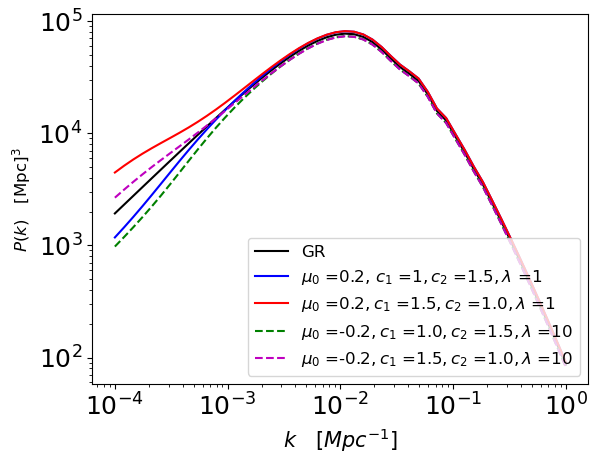

In [5]:
k = np.logspace(-4, 0) # 1 / Mpc units

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

Pk_GR_C = ccl.linear_matter_power(cosmo_GR_C, k, a=1.)
Pk_1_C = ccl.linear_matter_power(cosmo_1_C, k, a=1.)
Pk_2_C = ccl.linear_matter_power(cosmo_2_C, k, a=1.)
Pk_3_C = ccl.linear_matter_power(cosmo_3_C, k, a=1.)
Pk_4_C = ccl.linear_matter_power(cosmo_4_C, k, a=1.)

plt.loglog(k, Pk_GR_C, 'k', label='GR')
plt.loglog(k, Pk_1_C, 'b', label='$\mu_0$ ='+str(mu_0[0])+', $c_1$ ='+str(c1_mg[0])+
          '$, c_2$ ='+str(c2_mg[0])+'$, \lambda$ ='+str(lambda_mg[0]))
plt.loglog(k, Pk_2_C, 'r', label='$\mu_0$ ='+str(mu_0[1])+'$, c_1$ ='+str(c1_mg[1])+
          '$, c_2$ ='+str(c2_mg[1])+'$, \lambda$ ='+str(lambda_mg[1]))
plt.loglog(k, Pk_3_C, '--g', label='$\mu_0$ ='+str(mu_0[2])+'$, c_1$ ='+str(c1_mg[2])+
          '$, c_2$ ='+str(c2_mg[2])+'$, \lambda$ ='+str(lambda_mg[2]))
plt.loglog(k, Pk_4_C, '--m', label='$\mu_0$ ='+str(mu_0[3])+'$, c_1$ ='+str(c1_mg[3])+
          '$, c_2$ ='+str(c2_mg[3])+'$, \lambda$ ='+str(lambda_mg[3]))

plt.xlabel('$k\quad[Mpc^{-1}]$', fontsize = 15)
plt.ylabel('$P(k)\quad[{\\rm Mpc}]^3$', fontsize=12)
plt.legend(fontsize=12, loc='lower right')

plt.show()

## Weak Lensing C_ell's

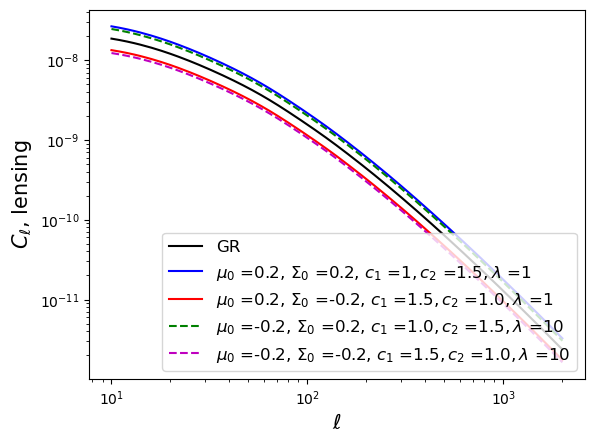

In [6]:
# Redshift array
z = np.linspace(0., 3., 600)
# Number density input
n = np.exp(-((z-0.5)/0.1)**2)
        
# ell range input
ell = np.arange(10, 2000)
     
# ClTracer objects

lens_GR_C = ccl.WeakLensingTracer(cosmo_GR_C, dndz=(z,n))
lens_1_C = ccl.WeakLensingTracer(cosmo_1_C, dndz=(z,n))
lens_2_C = ccl.WeakLensingTracer(cosmo_2_C, dndz=(z,n))
lens_3_C = ccl.WeakLensingTracer(cosmo_3_C, dndz=(z,n))
lens_4_C = ccl.WeakLensingTracer(cosmo_4_C, dndz=(z,n))

Cl_lensing_GR_C = ccl.angular_cl(cosmo_GR_C, lens_GR_C, lens_GR_C, ell)
Cl_lensing_1_C = ccl.angular_cl(cosmo_1_C, lens_1_C, lens_1_C, ell)
Cl_lensing_2_C = ccl.angular_cl(cosmo_2_C, lens_2_C, lens_2_C, ell)
Cl_lensing_3_C = ccl.angular_cl(cosmo_3_C, lens_3_C, lens_3_C, ell)
Cl_lensing_4_C = ccl.angular_cl(cosmo_4_C, lens_4_C, lens_4_C, ell)

plt.figure()
plt.loglog(ell, Cl_lensing_GR_C, 'k', label='GR')
plt.loglog(ell, Cl_lensing_1_C, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+', $c_1$ ='+str(c1_mg[0])+
          '$, c_2$ ='+str(c2_mg[0])+'$, \lambda$ ='+str(lambda_mg[0]))
plt.loglog(ell, Cl_lensing_2_C, 'r', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+', $c_1$ ='+str(c1_mg[1])+
          '$, c_2$ ='+str(c2_mg[1])+'$, \lambda$ ='+str(lambda_mg[1]))
plt.loglog(ell, Cl_lensing_3_C, '--g', 
           label='$\mu_0$ ='+str(mu_0[2])+', $\Sigma_0$ =' + str(sigma_0[2])+', $c_1$ ='+str(c1_mg[2])+
          '$, c_2$ ='+str(c2_mg[2])+'$, \lambda$ ='+str(lambda_mg[2]))
plt.loglog(ell, Cl_lensing_4_C, '--m', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+', $c_1$ ='+str(c1_mg[3])+
          '$, c_2$ ='+str(c2_mg[3])+'$, \lambda$ ='+str(lambda_mg[3]))

plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, lensing', fontsize=15)
plt.legend(fontsize=12, loc='lower right')
plt.show()

##  Weak Lensing Correlations 

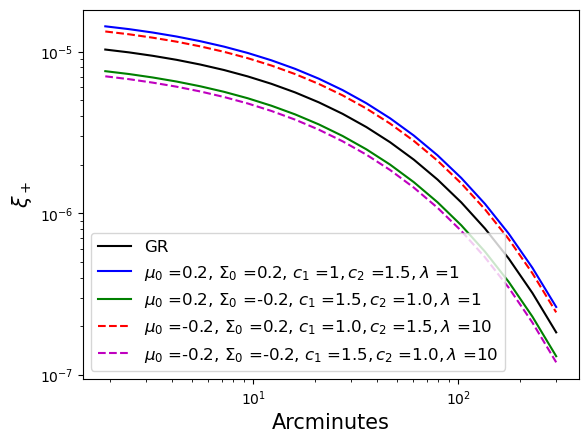

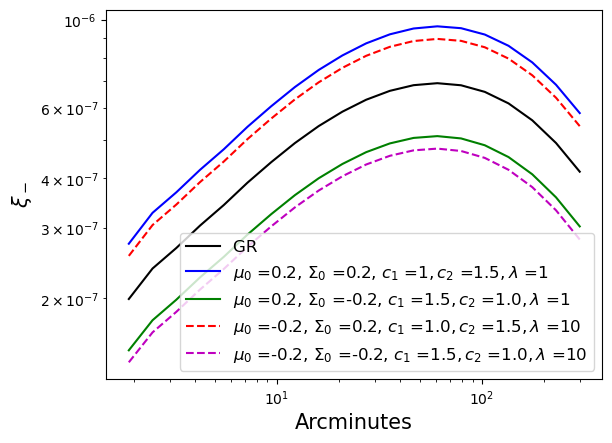

In [8]:
theta = np.logspace(-1.5, np.log10(5), 20) # In degrees

xi_p_GR_C = ccl.correlation(cosmo_GR_C, ell=ell, C_ell=Cl_lensing_GR_C, theta=theta, 
                          type='GG+', method='fftlog')
xi_p_1_C = ccl.correlation(cosmo_1_C, ell=ell, C_ell=Cl_lensing_1_C, theta=theta, 
                          type='GG+', method='fftlog')
xi_p_2_C = ccl.correlation(cosmo_2_C, ell=ell, C_ell=Cl_lensing_2_C, theta=theta, 
                          type='GG+', method='fftlog')
xi_p_3_C = ccl.correlation(cosmo_3_C, ell=ell, C_ell=Cl_lensing_3_C, theta=theta, 
                          type='GG+', method='fftlog')
xi_p_4_C = ccl.correlation(cosmo_4_C, ell=ell, C_ell=Cl_lensing_4_C, theta=theta, 
                          type='GG+', method='fftlog')


xi_m_GR_C = ccl.correlation(cosmo_GR_C, ell=ell, C_ell=Cl_lensing_GR_C, theta=theta,
                         type='GG-', method='fftlog')
xi_m_1_C = ccl.correlation(cosmo_1_C, ell=ell, C_ell=Cl_lensing_1_C, theta=theta,
                         type='GG-', method='fftlog')
xi_m_2_C = ccl.correlation(cosmo_2_C, ell=ell, C_ell=Cl_lensing_2_C, theta=theta, 
                         type='GG-', method='fftlog')
xi_m_3_C = ccl.correlation(cosmo_3_C, ell=ell, C_ell=Cl_lensing_3_C, theta=theta,
                         type='GG-', method='fftlog')
xi_m_4_C = ccl.correlation(cosmo_4_C, ell=ell, C_ell=Cl_lensing_4_C, theta=theta, 
                         type='GG-', method='fftlog')

theta_amin = theta * 60. # In arcminutes.

plt.figure()
plt.loglog(theta_amin, xi_p_GR_C, 'k', label='GR')
plt.loglog(theta_amin, xi_p_1_C, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+', $c_1$ ='+str(c1_mg[0])+
          '$, c_2$ ='+str(c2_mg[0])+'$, \lambda$ ='+str(lambda_mg[0]))
plt.loglog(theta_amin, xi_p_2_C, 'g', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+', $c_1$ ='+str(c1_mg[1])+
          '$, c_2$ ='+str(c2_mg[1])+'$, \lambda$ ='+str(lambda_mg[1]))
plt.loglog(theta_amin, xi_p_3_C, '--r', 
           label='$\mu_0$ ='+str(mu_0[2])+', $\Sigma_0$ =' + str(sigma_0[2])+', $c_1$ ='+str(c1_mg[2])+
          '$, c_2$ ='+str(c2_mg[2])+'$, \lambda$ ='+str(lambda_mg[2]))
plt.loglog(theta_amin, xi_p_4_C, '--m', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+', $c_1$ ='+str(c1_mg[3])+
          '$, c_2$ ='+str(c2_mg[3])+'$, \lambda$ ='+str(lambda_mg[3]))
plt.legend(fontsize=12)
plt.xlabel('Arcminutes', fontsize = 15)
plt.ylabel('$\\xi_+$', fontsize=15)
plt.show()

plt.figure()
plt.loglog(theta_amin, xi_m_GR_C, 'k', label='GR ')
plt.loglog(theta_amin, xi_m_1_C, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+', $c_1$ ='+str(c1_mg[0])+
          '$, c_2$ ='+str(c2_mg[0])+'$, \lambda$ ='+str(lambda_mg[0]))
plt.loglog(theta_amin, xi_m_2_C, 'g', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+', $c_1$ ='+str(c1_mg[1])+
          '$, c_2$ ='+str(c2_mg[1])+'$, \lambda$ ='+str(lambda_mg[1]))
plt.loglog(theta_amin, xi_m_3_C, '--r', 
           label='$\mu_0$ ='+str(mu_0[2])+', $\Sigma_0$ =' + str(sigma_0[2])+', $c_1$ ='+str(c1_mg[2])+
          '$, c_2$ ='+str(c2_mg[2])+'$, \lambda$ ='+str(lambda_mg[2]))
plt.loglog(theta_amin, xi_m_4_C, '--m', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+', $c_1$ ='+str(c1_mg[3])+
          '$, c_2$ ='+str(c2_mg[3])+'$, \lambda$ ='+str(lambda_mg[3]))
plt.legend(fontsize=12)
plt.xlabel('Arcminutes', fontsize = 15)
plt.ylabel('$\\xi_-$', fontsize=15)
plt.show()

## CMB Lensing C_ell's 

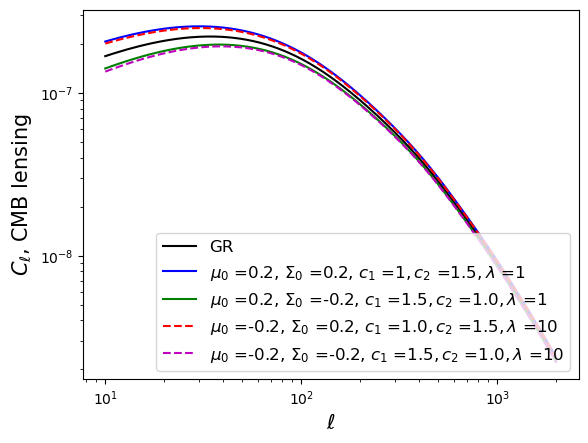

In [9]:
# Cl Tracer objects
cmbl_GR_C = ccl.CMBLensingTracer(cosmo_GR_C,z_source=1089.)
cmbl_1_C = ccl.CMBLensingTracer(cosmo_1_C,z_source=1089.)
cmbl_2_C = ccl.CMBLensingTracer(cosmo_2_C,z_source=1089.)
cmbl_3_C = ccl.CMBLensingTracer(cosmo_3_C,z_source=1089.)
cmbl_4_C = ccl.CMBLensingTracer(cosmo_4_C,z_source=1089.)

Cl_cmb_GR_C = ccl.angular_cl(cosmo_GR_C, cmbl_GR_C, cmbl_GR_C, ell)
Cl_cmb_1_C = ccl.angular_cl(cosmo_1_C, cmbl_1_C, cmbl_1_C, ell)
Cl_cmb_2_C = ccl.angular_cl(cosmo_2_C, cmbl_2_C, cmbl_2_C, ell)
Cl_cmb_3_C = ccl.angular_cl(cosmo_3_C, cmbl_3_C, cmbl_3_C, ell)
Cl_cmb_4_C = ccl.angular_cl(cosmo_4_C, cmbl_4_C, cmbl_4_C, ell)

plt.figure()
plt.loglog(ell, Cl_cmb_GR_C, 'k', label='GR')
plt.loglog(ell, Cl_cmb_1_C, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+', $c_1$ ='+str(c1_mg[0])+
          '$, c_2$ ='+str(c2_mg[0])+'$, \lambda$ ='+str(lambda_mg[0]))
plt.loglog(ell, Cl_cmb_2_C, 'g', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+', $c_1$ ='+str(c1_mg[1])+
          '$, c_2$ ='+str(c2_mg[1])+'$, \lambda$ ='+str(lambda_mg[1]))
plt.loglog(ell, Cl_cmb_3_C, '--r', 
           label='$\mu_0$ ='+str(mu_0[2])+', $\Sigma_0$ =' + str(sigma_0[2])+', $c_1$ ='+str(c1_mg[2])+
          '$, c_2$ ='+str(c2_mg[2])+'$, \lambda$ ='+str(lambda_mg[2]))
plt.loglog(ell, Cl_cmb_4_C, '--m', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+', $c_1$ ='+str(c1_mg[3])+
          '$, c_2$ ='+str(c2_mg[3])+'$, \lambda$ ='+str(lambda_mg[3]))
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, CMB lensing', fontsize=15)
plt.legend(fontsize=12,loc='lower right')
plt.show()

# Number count tracers with magnification bias

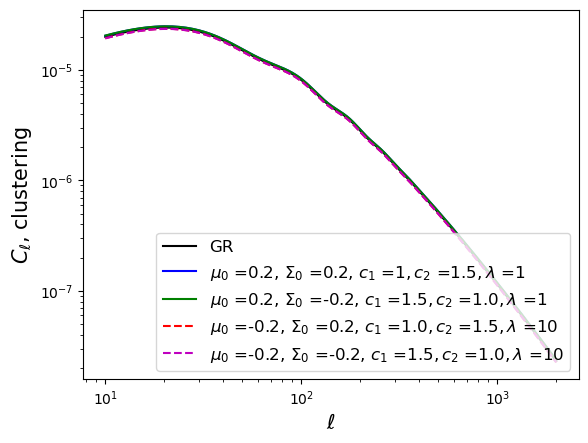

In [10]:
# Redshift array
z = np.linspace(0., 3., 600)
# Number density input
n = np.exp(-((z-0.5)/0.1)**2)
# Bias input
b = np.sqrt(1. + z)
mb = np.exp(1. + z)/10
        
# ell range input
ell = np.arange(10, 2000)

# Cl Tracer objects
nc_GR_C = ccl.NumberCountsTracer(cosmo_GR_C, has_rsd=False, dndz=(z,n), bias=(z,b), mag_bias=(z,mb))
nc_1_C = ccl.NumberCountsTracer(cosmo_1_C, has_rsd=False, dndz=(z,n), bias=(z,b), mag_bias=(z,mb))
nc_2_C = ccl.NumberCountsTracer(cosmo_2_C, has_rsd=False, dndz=(z,n), bias=(z,b), mag_bias=(z,mb))
nc_3_C = ccl.NumberCountsTracer(cosmo_3_C, has_rsd=False, dndz=(z,n), bias=(z,b), mag_bias=(z,mb))
nc_4_C = ccl.NumberCountsTracer(cosmo_4_C, has_rsd=False, dndz=(z,n), bias=(z,b), mag_bias=(z,mb))

Cl_nc_GR_C = ccl.angular_cl(cosmo_GR_C, nc_GR_C, nc_GR_C, ell)
Cl_nc_1_C = ccl.angular_cl(cosmo_1_C, nc_1_C, nc_1_C, ell)
Cl_nc_2_C = ccl.angular_cl(cosmo_2_C, nc_2_C, nc_2_C, ell)
Cl_nc_3_C = ccl.angular_cl(cosmo_3_C, nc_3_C, nc_3_C, ell)
Cl_nc_4_C = ccl.angular_cl(cosmo_4_C, nc_4_C, nc_4_C, ell)

plt.figure()
plt.loglog(ell, Cl_nc_GR_C, 'k', label='GR')
plt.loglog(ell, Cl_nc_1_C, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+', $c_1$ ='+str(c1_mg[0])+
          '$, c_2$ ='+str(c2_mg[0])+'$, \lambda$ ='+str(lambda_mg[0]))
plt.loglog(ell, Cl_nc_2_C, 'g', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+', $c_1$ ='+str(c1_mg[1])+
          '$, c_2$ ='+str(c2_mg[1])+'$, \lambda$ ='+str(lambda_mg[1]))
plt.loglog(ell, Cl_nc_3_C, '--r', 
           label='$\mu_0$ ='+str(mu_0[2])+', $\Sigma_0$ =' + str(sigma_0[2])+', $c_1$ ='+str(c1_mg[2])+
          '$, c_2$ ='+str(c2_mg[2])+'$, \lambda$ ='+str(lambda_mg[2]))
plt.loglog(ell, Cl_nc_4_C, '--m', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+', $c_1$ ='+str(c1_mg[3])+
          '$, c_2$ ='+str(c2_mg[3])+'$, \lambda$ ='+str(lambda_mg[3]))
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, clustering', fontsize=15)
plt.legend(fontsize=12,loc='lower right')
plt.show()